___
# PROJETO 1

## <font color='red'>Alexandre Young Coelho da Costa</font>
___

## <font color='blue'>Análise da população aposentada: Como a idade com que se começou a trabalhar se correlaciona com o estado da aposentadoria</font>

## Introdução

O intuito do projeto é estudar a população aposentada em relação à idade com que começaram a trabalhar

Partimos da hipótese que a introdução tardia ao mercado de trabalho se correlaciona positivamente com o nível de ensino alcançado e o bem-estar financeiro após a aposentadoria, embasamos essa hipótese inicial no estudo sobre a inserção de jóvens no mercado de trabalho disponível em: http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0103-49792008000300009

___
## Análise e Resultados

In [43]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [44]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Alexandre Young\Documents\Insper\2 Semestre\CieDa\Proj1\Entrega


In [45]:
#Leitura da base já em formato de DataFrame e extensão .csv
pnad2014 = pd.read_csv('PES2014.csv', sep=',')
pnad2011= pd.read_csv('PES2011.csv', sep=',')

___

In [234]:
#Este frame reservado para preparar na memória as categorias e seleções relevantes a serem usadas durante o projeto

pnad2014.aposentados= pnad2014.V9122.astype('category')
pnad2011.aposentados= pnad2011.V9122.astype('category')
#Quando o valor dessa cateogoria for 2 é que estamos lidando com uma pessoa aposentada, 4 quando não for

pnad2014.renda_domiciliar= pnad2014.V4742.astype('float')

pnad2014.renda_familiar= pnad2014.V4750.astype('float')

pnad2014.começou_a_trabalhar= pnad2014.V9891.astype('category')
pnad2011.começou_a_trabalhar= pnad2011.V9891.astype('category')
#Quando o valor da categoria for 1: começou com até 9 anos
#2: 10 a 14 anos
#3: 15 a 17 anos
#4: 18 a 19 anos
#5: 20 a 24 anos
#6: 25 a 29 anos
#7: 30 anos ou mais

pnad2014.série_atingida= pnad2014.V0610.astype('category')
#Cada valor numérivo equivale a uma série atingida
#1 a 8: primeiro a oitavo ano
#0: nono ano

pnad2014.concluiu_escola= pnad2014.V0611.astype('category')

## ASDA

    Para montar um perfil inicial da população aposentada quebramos nossa população em faixas diferentes separando as idades com que começaram a trabalhar

1.0    27.5
2.0    43.4
3.0    14.9
4.0     7.5
5.0     4.8
6.0     1.2
7.0     0.7
Name: V9891, dtype: float64


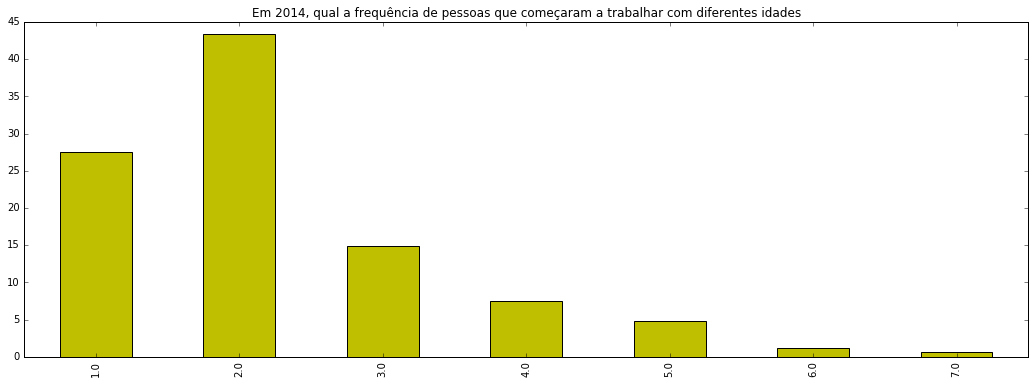

In [63]:
atual= pnad2014.começou_a_trabalhar[pnad2014.aposentados == 2].dropna()
n=atual.shape[0]
freq = (atual.value_counts()/n*100).round(decimals=1).reindex([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])

print(freq)
freq.plot(kind='bar',title='Em 2014, qual a frequência de pessoas que começaram a trabalhar com diferentes idades',figsize=(18, 6),color=('y'))

## Primeiro Passo

    A grande maioria dos etrevistados, 70,9%, começou a trabalhar com 14 anos ou menos, sendo que 85.8% começou a trabalhar antes de atingir a maioridade etária legal

    Para validar a nossa hipótese inicial devemos conferir se as diferentes faixas observadas implicam em diferentes níveis de renda e educação

1271.175468483816


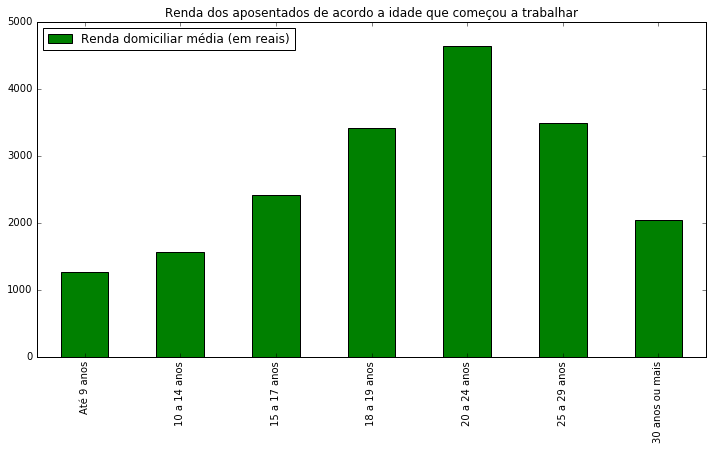

In [143]:
atual= pd.DataFrame()
atual["começou_a_trabalhar"]= pnad2014.começou_a_trabalhar[pnad2014.aposentados == 2]
atual["renda_domiciliar"]= pnad2014.renda_domiciliar[pnad2014.aposentados == 2]
atual= atual.dropna()

print( atual.renda_domiciliar[(atual.começou_a_trabalhar == 1.0) & (atual.renda_domiciliar<= 99999999999)].mean() )

teste= pd.DataFrame()
teste["Até 9 anos"]= [atual.renda_domiciliar[(atual.começou_a_trabalhar == 1.0) & (atual.renda_domiciliar<= 99999999999)].mean()]
teste["10 a 14 anos"]= [atual.renda_domiciliar[(atual.começou_a_trabalhar == 2.0) & (atual.renda_domiciliar<= 99999999999)].mean()]
teste["15 a 17 anos"]= [atual.renda_domiciliar[(atual.começou_a_trabalhar == 3.0) & (atual.renda_domiciliar<= 99999999999)].mean()]
teste["18 a 19 anos"]= [atual.renda_domiciliar[(atual.começou_a_trabalhar == 4.0) & (atual.renda_domiciliar<= 99999999999)].mean()]
teste["20 a 24 anos"]= [atual.renda_domiciliar[(atual.começou_a_trabalhar == 5.0) & (atual.renda_domiciliar<= 99999999999)].mean()]
teste["25 a 29 anos"]= [atual.renda_domiciliar[(atual.começou_a_trabalhar == 6.0) & (atual.renda_domiciliar<= 99999999999)].mean()]
teste["30 anos ou mais"]= [atual.renda_domiciliar[(atual.começou_a_trabalhar == 7.0) & (atual.renda_domiciliar<= 99999999999)].mean()]
teste=teste.T
teste.columns = ['Renda domiciliar média (em reais)']

teste.plot(kind='bar',title='Renda domiciliar dos aposentados de acordo a idade que começou a trabalhar',figsize=(12, 6),color=('g'))

1292.3106498809118


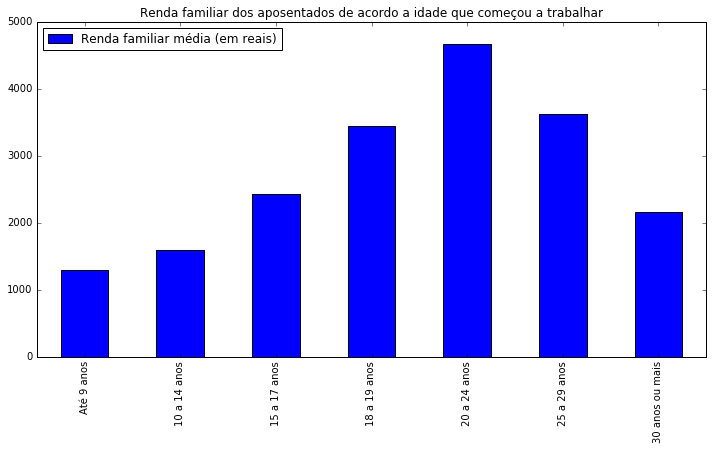

In [154]:
atual= pd.DataFrame()
atual["começou_a_trabalhar"]= pnad2014.começou_a_trabalhar[pnad2014.aposentados == 2]
atual["renda_familiar"]= pnad2014.renda_familiar[pnad2014.aposentados == 2]
atual= atual.dropna()

print( atual.renda_familiar[(atual.começou_a_trabalhar == 1.0) & (atual.renda_familiar<= 99999999999)].mean() )

teste= pd.DataFrame()
teste["Até 9 anos"]= [atual.renda_familiar[(atual.começou_a_trabalhar == 1.0) & (atual.renda_familiar< 99999999999)].mean()]
teste["10 a 14 anos"]= [atual.renda_familiar[(atual.começou_a_trabalhar == 2.0) & (atual.renda_familiar< 99999999999)].mean()]
teste["15 a 17 anos"]= [atual.renda_familiar[(atual.começou_a_trabalhar == 3.0) & (atual.renda_familiar< 99999999999)].mean()]
teste["18 a 19 anos"]= [atual.renda_familiar[(atual.começou_a_trabalhar == 4.0) & (atual.renda_familiar< 99999999999)].mean()]
teste["20 a 24 anos"]= [atual.renda_familiar[(atual.começou_a_trabalhar == 5.0) & (atual.renda_familiar< 99999999999)].mean()]
teste["25 a 29 anos"]= [atual.renda_familiar[(atual.começou_a_trabalhar == 6.0) & (atual.renda_familiar< 99999999999)].mean()]
teste["30 anos ou mais"]= [atual.renda_familiar[(atual.começou_a_trabalhar == 7.0) & (atual.renda_familiar< 99999999999)].mean()]
teste=teste.T
teste.columns = ['Renda familiar média (em reais)']

teste.plot(kind='bar',title='Renda familiar dos aposentados de acordo a idade que começou a trabalhar',figsize=(12, 6),color=('b'))

## Análise

É possível perceber que existe sim uma relação entre a idade com que se começou a trabalhar e a renda domiciliar do aposentado, mas ela não é tão direta quanto a hipótese sugeriu
Até o intervalo de 20 a 24 anos a renda cresce quanto mais tarde o entrevistado entra no mercado de trabalho, mas a tendência então atinge um ápice e passa a ser contrária

Em seguida vamos analisar como o nível de escolaridade dos aposentados se relaciona à idade em que começaram a trabalhar

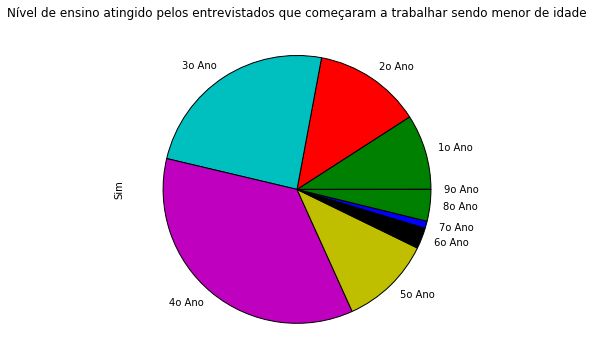

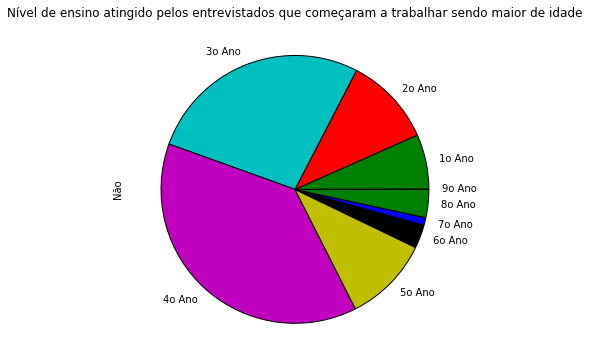

Começou a trabalhar quando menor de idade,Não,Sim
Ano Escolar Atingido,,
9o Ano,12,1
1o Ano,1464,485
2o Ano,2389,692
3o Ano,6018,1294
4o Ano,8429,1893
5o Ano,2311,589
6o Ano,629,135
7o Ano,204,46
8o Ano,753,204


In [230]:
#separar entre aqueles que começaram a trabalhar antes da maioriade etária legal e depois

atual= pd.DataFrame()
atual["começou_a_trabalhar"]= pnad2014.começou_a_trabalhar[pnad2014.aposentados == 2]
atual.loc[(atual.começou_a_trabalhar== 1.0) | (atual.começou_a_trabalhar== 2.0),"Começou a trabalhar quando menor de idade"]="Sim"
atual.loc[(atual.começou_a_trabalhar!= 1.0) & (atual.começou_a_trabalhar!= 2.0),"Começou a trabalhar quando menor de idade"]="Não"
del atual["começou_a_trabalhar"]
maioridade= atual

teste=pd.crosstab(pnad2014.série_atingida[pnad2014.aposentados == 2], atual["Começou a trabalhar quando menor de idade"], margins=True, rownames=['Ano Escolar Atingido'], colnames=["Começou a trabalhar quando menor de idade"])
del teste["All"]
teste= teste.iloc[:-1,:]
teste= teste.rename(index={0.0: '9o Ano', 1.0: '1o Ano', 2.0: '2o Ano', 3.0: '3o Ano', 4.0: '4o Ano', 5.0: '5o Ano', 6.0: '6o Ano', 7.0: '7o Ano', 8.0: '8o Ano', })
teste["Sim"].plot(kind='pie',title='Nível de ensino atingido pelos entrevistados que começaram a trabalhar sendo menor de idade',figsize=(6, 6))
plt.show()
teste["Não"].plot(kind='pie',title='Nível de ensino atingido pelos entrevistados que começaram a trabalhar sendo maior de idade',figsize=(6, 6))
plt.show()
teste
#atual.dropna()

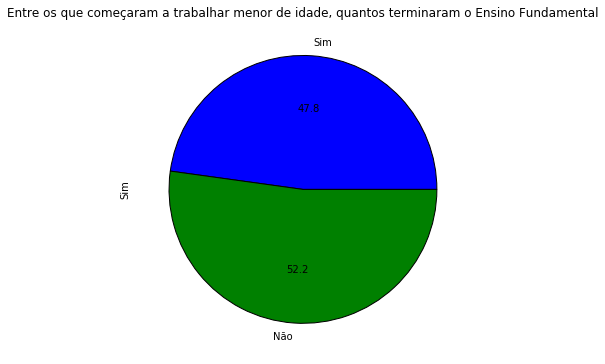

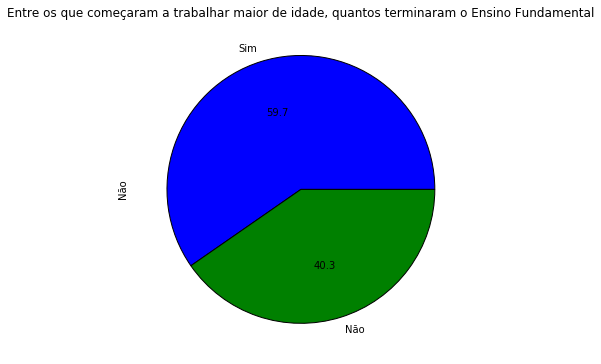

Começou a trabalhar quando menor de idade,Não,Sim
Concluiu o Ensino Fundamental,,
Sim,13995,2769
Não,9464,3022


In [274]:
atual= pd.DataFrame()
atual["concluiu_escola"]= pnad2014.concluiu_escola[pnad2014.aposentados == 2]

teste=pd.crosstab(maioridade["Começou a trabalhar quando menor de idade"], atual["concluiu_escola"], margins=True, rownames=['Começou a trabalhar quando menor de idade'], colnames=["Concluiu o Ensino Fundamental"])
del teste["All"]
teste= teste.T
del teste["All"]
teste= teste.rename(index={1.0: 'Sim', 3.0: "Não"})
teste["Sim"].plot(kind='pie',title='Entre os que começaram a trabalhar menor de idade, quantos terminaram o Ensino Fundamental',autopct='%.1f',figsize=(6, 6))
plt.show()
teste["Não"].plot(kind='pie',title='Entre os que começaram a trabalhar maior de idade, quantos terminaram o Ensino Fundamental',autopct='%.1f',figsize=(6, 6))
plt.show()
teste

## Análise

    Quebrando os aposentados em dois grupos aqueles, que começaram a trabalhar quando eram menores de idade (<18 anos) e maiores de idade não nos dá uma informação tão discriminante quanto no caso da renda, a primeira vista parece que a correlação entre anos de estudo e renda familiar pós-aposentadoria é secundária
    
    Para uma análise mais profunda vamos fazer uma análise de como a conclusão do ensino fundamental se apresenta proporcionalmente ao número de pessoas que começaram a trabalhar em cada faixa de idade

Concluiu o Ensino Fundamental
Sim    42
Não    57
Name: 1 a 9 anos, dtype: int64


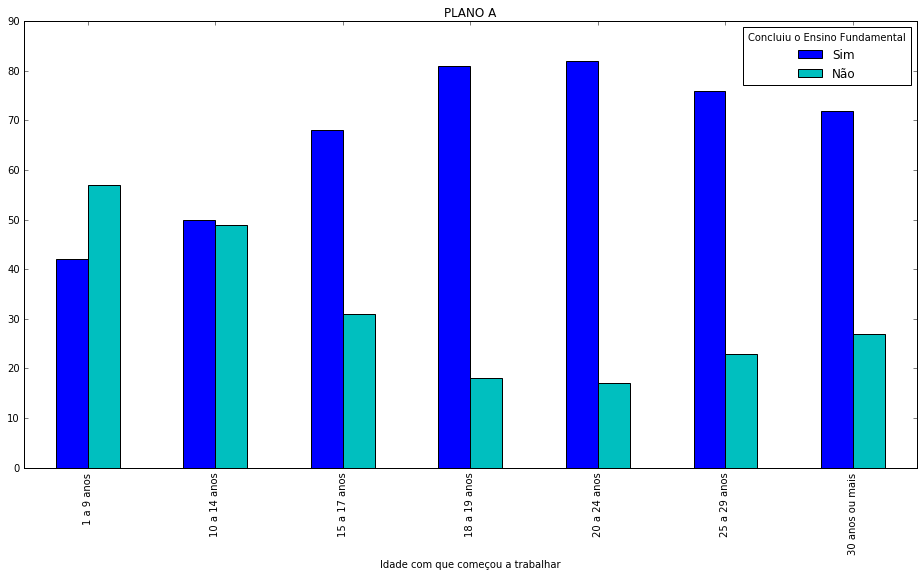

Concluiu o Ensino Fundamental,Sim,Não
Idade com que começou a trabalhar,,
1 a 9 anos,42,57
10 a 14 anos,50,49
15 a 17 anos,68,31
18 a 19 anos,81,18
20 a 24 anos,82,17
25 a 29 anos,76,23
30 anos ou mais,72,27


In [272]:
atual= pd.DataFrame()
atual["começou_a_trabalhar"]= pnad2014.começou_a_trabalhar[pnad2014.aposentados == 2]

teste= pd.crosstab(atual["começou_a_trabalhar"], pnad2014.concluiu_escola[pnad2014.aposentados == 2], rownames=['Idade com que começou a trabalhar'], colnames=["Concluiu o Ensino Fundamental"]);
teste= teste.rename(index={1.0: '1 a 9 anos', 2.0: '10 a 14 anos', 3.0: '15 a 17 anos', 4.0: '18 a 19 anos', 5.0: '20 a 24 anos', 6.0: '25 a 29 anos', 7.0: '30 anos ou mais'})
teste= teste.T
teste= teste.rename(index={1.0: 'Sim', 3.0: "Não"})

for coluna in teste:
    t= teste[coluna][0]+teste[coluna][1]
    teste[coluna][0]*= 100.0
    teste[coluna][0]/= t
    teste[coluna][1]*= 100.0
    teste[coluna][1]/=t
#em porcentual
    
print(teste['1 a 9 anos'])
teste= teste.T
teste


teste.plot(kind="bar",title='PLANO A',color=('b', 'c'),figsize=(16, 8))
plt.show()
teste

## Análise

É possível analisar mais claramente no último gráfico que a entrada mais tardia no mercado de trabalho tem uma relação com a conclusão do ensino fundamental
Assim como para o gráfico da renda pode-se ver que a proporção daqueles que concluíram é maior no intervalo de 20 a 24 anos passando a decair lentamente a partir desse valor

___
## Conclusão 

Das nossas observações podemos concluir que existe uma correlação entre o ano que o aposentado entrou no mercado de trabalho, quanto sua família atualmente gera de renda e a escolaridade que teve, mas não é uma relação simplesmente linear, a entrada no mercado de trabalho feita entre os 20 a 24 anos parece favorecer um balanço financeiro mais abundante, diminuindo um pouco quanto mais dessa faixa se afasta
O motivo pelo qual essa faixa etária particularmente aparenta ser ideal é possivelmente por ser a idade em que alunos que puderam concluir seus estudos escolheram entrar no mercado de trabalho